In [1]:
%pylab inline
plt.style.use('dark_background')
pylab.rcParams['figure.figsize'] = (10.0, 6.0)

Populating the interactive namespace from numpy and matplotlib


# Polynomial Trajectories

In [2]:
def point_to_point_traj(x1, x2, v1, v2, delta_t):
    t = np.linspace(0, delta_t, 100)  
    a0 = x1
    a1 = v1
    a2 = (3*x2 - 3*x1 - 2*v1*delta_t - v2 * delta_t) / (delta_t**2)
    a3 = (2*x1 + (v1 + v2) * delta_t  - 2 * x2) / (delta_t**3)
    
    polynomial = a0 + a1 * t + a2 * t**2 + a3 * t**3
    derivative = a1 + 2*a2 * t + 3 * a3 * t**2
    return polynomial, derivative


def piecewise2D (X,Y, Vx, Vy, T):
    theta_x, theta_y, dx, dy = [], [], [], []

    for i in range(len(P)-1):          
        theta_xi, dxi = point_to_point_traj(X[i], X[i+1], Vx[i], Vx[i+1], T[i+1] - T[i])
        theta_yi, dyi = point_to_point_traj(Y[i], Y[i+1], Vy[i], Vy[i+1], T[i+1] - T[i])

        theta_x += theta_xi.tolist()
        theta_y += theta_yi.tolist()
        dx += dxi.tolist()
        dy += dyi.tolist()

        plot(theta_xi, theta_yi)
    return theta_x, theta_y, dx, dy

# Plotting functions

In [3]:
# Plotting
def plot_points():
    plot(X,Y, '--')
    plot(X,Y, 'o')
    quiver(X,Y, Vx, Vy, color='r')
    
# Speed
def plot_speed():
    speed = np.sqrt(np.array(dx)**2 + np.array(dy)**2)
    plot(speed)

In [4]:
##### Requirements for the trajectory

# Waypoints
p1 = [-5.,-7]
p2 = [10,-7]
p3 = [10,-3]
p4 = [0,-3]
p5 = [0,6]
p6 = [3,6]
p7 = [3,-2.5]
p8 = [7,-2.5]
p9 = [7,10]
p10 = [9,10]

# Velocities
v1 = [1,0]
v2 = [0,1]
v3 = [-1,0]
v4 = [0,1]
v5 = [1,0]
v6 = [0,-1]
v7 = [1,0]
v8 = [0,1]
v9 = [1,0]
v10 = [0,0]

# Time
t1 = 0
t2 = 12
t3 = 22
t4 = 32
t5 = 42
t6 = 52
t7 = 62
t8 = 72
t9 = 82
t10 = 92

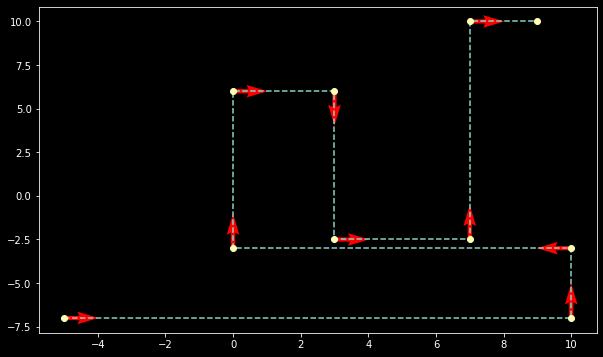

In [5]:
# Convert the initial conditions to a vector form
P = np.vstack((p1, p2, p3, p4, p5, p6, p7, p8, p9, p10))
V = np.vstack((v1, v2, v3, v4, v5, v6, v7, v8, v9,v10))
T = [t1, t2, t3, t4, t5, t6, t7, t8, t9,t10]

X, Y = P[:,0], P[:,1]
Vx, Vy = V[:,0], V[:,1]


    
plot_points()

## Explanation

I first calculated the number of points I would need, which was the number of times the velocity changed + the initial and final points. This would add up to 10 points, which all have different velocities. 